In [1]:
import pandas as pd
import io
import zipfile
import requests
import geopandas as gpd
import shapely.geometry
from shapely.geometry import Point
import pyproj
import numpy as np
import matplotlib.pyplot as plt
import math
import os, sys

from skimage.feature import hog
from skimage import data, exposure

print ("Imported!")

Imported!


In [2]:
#set up survey file paths

survey = "HI1470"

path = '..//..//..//Documents//Test_sets//Testing_Sample//HI1470//Edits//'
pathshp = '..//..//..//Documents//Test_sets//Testing_Sample//HI1470'

array = np.load(path + 'array10m//arraymin_1.npy')
arraySS = np.load(path + 'array10m//arraySS_1.npy')

geosurveyp = pd.read_csv(path + 'HI1470_1_EPSG3035')
ss = pd.read_csv(path+'HI1470_SS_1.csv')

breakdown = 1

In [3]:
# step is the size of the gridding used (e.g. 10m by 10m)

step = 10
hogval = 15
savepath = '..//..//..//Documents//Test_sets//Testing_Sample//HOG_testsets_10m//comp//Min'

In [4]:
#find the corners of the projected dataset and the min/max depth for plotting

minx = geosurveyp['Xp'].min()
maxx = geosurveyp['Xp'].max()
rangex = maxx-minx

print (minx, maxx, rangex)

miny = geosurveyp['Yp'].min()
maxy = geosurveyp['Yp'].max()
rangey = maxy-miny

print ( miny, maxy, rangey)

minz = geosurveyp['Depth'].min()
maxz = geosurveyp['Depth'].max()

3159328.99003 3171579.81425 12250.8242201
3108449.72196 3116944.49097 8494.76900933


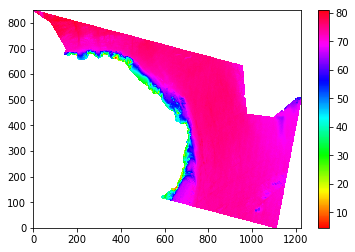

In [5]:
#col is the number of columns in the gridded dataset, rows the number of rows (found by dividing the length of each side in m by the step)
#plot the gridded survey to check it looks reasonable

col = math.ceil(rangex/step)
row = math.ceil(rangey/step)

xi = np.arange(0, col)
yi = np.arange(0, row)
X, Y = np.meshgrid(xi, yi)
Z = array[Y,X]

import numpy.ma as ma
Lm = ma.masked_where(np.isnan(Z),Z)

plt.pcolor(X, Y, Lm, cmap='hsv', vmin=minz, vmax=maxz)
plt.colorbar()

plt.show()

In [6]:
array.shape

(850, 1226)

/anaconda/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


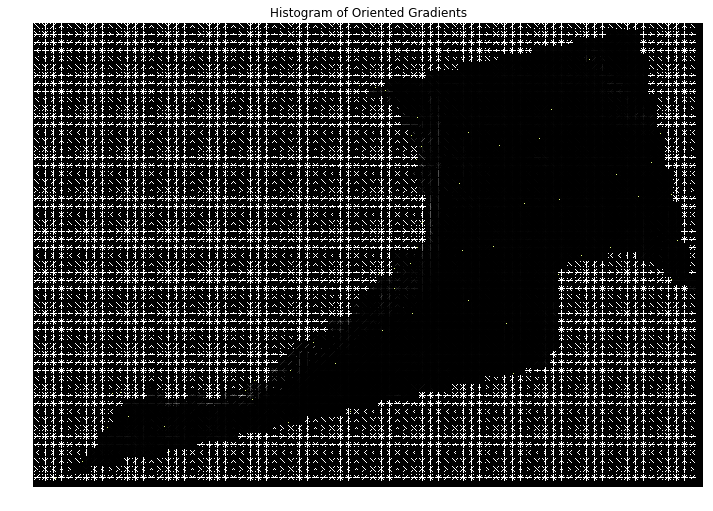

In [7]:
#HOG 

image = array

fd, hog_image = hog(image, orientations=4, pixels_per_cell=(hogval,hogval), cells_per_block=(1,1), visualise=True, feature_vector= False)

fig, (ax2) = plt.subplots(figsize=(12, 12))

#moved up arraySS = np.load(path + 'array5m//arraySS.npy')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

import numpy.ma as ma
Zm = ma.masked_equal(arraySS, 0)

ax2.axis('off')
im1 = ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
im2 = ax2.imshow(Zm,cmap=plt.cm.Wistia)
ax2.set_title('Histogram of Oriented Gradients')
# ax1.set_adjustable('box-forced')
plt.show()

In [8]:
#HOG produces a 4d array (row, col, block r,block c, then the 4 orientation values )
fd.shape

(56, 81, 1, 1, 4)

In [9]:
# create empty dataframe for output
HOG_output = pd.DataFrame()

In [10]:
rowH = int(fd.shape[0])
colH = int(fd.shape[1])

In [11]:
for r in range(0,fd.shape[0]):
    for c in range(0,fd.shape[1]):
        for a in range(0,1):
            for b in range(0,1):
                rown = [r,c,(fd[r][c][a][b][0]),(fd[r][c][a][b][1]),(fd[r][c][a][b][2]),(fd[r][c][a][b][3])]
                HOG_output = HOG_output.append([rown])
                print (fd[r][c][a][b])

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.27163213  0.19700856  0.2471932   0.2840694 ]
[ 0.33123807  0.25380831  0.1925789   0.22226761]
[ 0.28887131  0.25246936  0.25761334  0.20094719]
[ 0.1907496   0.19163813  0.35497822  0.2625046 ]
[ 0.08680059  0.16472109  0.52658986  0.22183454]
[ 0.08376165  0.0887229   0.64121497  0.18626686]
[ 0.19377793  0.16657268  0.25363907  0.38596544]
[ 0.19673781  0.11794123  0.300163

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.08456123  0.14214782  0.40430829  0.36897898]
[ 0.10215929  0.05956756  0.25852553  0.57971635]
[ 0.2217672   0.15908542  0.39063899  0.22842828]
[ 0.12500373  0.15262421  0.31407693  0.40823232]
[ 0.23205009  0.06846179  0.24516008  0.45426197]
[ 0.47648443  0.30450629  0.11079056  0.10820075]
[ 0.31818642  0.14532861  0.08994205  0.44650571]
[ 0.28060568  0.09133594  0.12801245  0.49998244]
[ 0.22345831  0.09725238  0.28976952  0.38943761]
[ 0.28826639  0.23432606  0.23300437  0.2443312 ]
[ 0.27975059  0.12537626  0.25587193  0.33890259]
[ 0.119515

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.05808856  0.08246364  0.45855453  0.40088778]
[ 0.          0.3910666   0.59379688  0.01512343]
[ 0.21871239  0.55250308  0.17868316  0.05008822]
[ 0.76722244  0.11797738  0.00896321  0.10582332]
[ 0.34763785  0.07631264  0.08800261  0.48800523]
[ 0.2603164   0.15860216  0.24333519  0.33766304]
[ 0.19965478  0.16663101  0.2375572   0.3960566 ]
[ 0.35149853  0.21223942  0.174782

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.0874963   0.1634181   0.32531819  0.4237622 ]
[ 0.05574853  0.34072113  0.3679373   0.23557319]
[ 0.4241432   0.30404206  0.07765818  0.19414594]
[ 0.39385949  0.05945817  0.03929843  0.50734653]
[ 0.2458731   0.09910393  0.16119013  0.49376511]
[ 0.34898121  0.27179785  0.10500474  0.27417734]
[ 0.26330957  0.0732186   0.19262607  0.47077711]
[ 0.21719847  0.30318814  0.245033

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.60720543  0.24328906  0.04569574  0.10379891]
[ 0.71875582  0.01220525  0.          0.26901787]
[ 0.81896723  0.00662746  0.          0.17437418]
[ 0.40076664  0.088082    0.12846991  0.38264118]
[ 0.155869    0.11415221  0.20039464  0.52950564]
[ 0.18889209  0.12341757  0.17616091  0.511456

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.56874489  0.01581592  0.05155029  0.36388113]
[ 0.46018605  0.19325742  0.09449196  0.25201582]
[ 0.30837479  0.14282369  0.19350965  0.35522526]
[ 0.34195286  0.21996197  0.16814959  0.2698496 ]
[ 0.31742501  0.29240501  0.16459361  0.22548036]
[ 0.25250721  0.17131625  0.23343283  0.34263249]
[ 0.35548058  0.17221289  0.16650798  0.30571668]
[ 0.24371382

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.17886457  0.2080165   0.40255952  0.21055485]
[ 0.35706887  0.14107854  0.13398755  0.3678534 ]
[ 0.66310886  0.15931027  0.0290364   0.14851583]
[ 0.5097916   0.26130314  0.05577234  0.17310771]
[ 0.71697296  0.10878941  0.02473635  0.14945983]
[ 0.38808784  0.15237873  0.17857546  0.28089043]
[ 0.31019868  0.21682718  0.26921686  0.20362054]
[ 0.28036367  0.18067011  0.18980691  0.34908643]
[ 0.28901954  0.25044808  0.15919746  0.30118945]
[ 0.29639234  0.24388729  0.19817683  0.2614

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.67723786  0.15197937  0.10613804  0.06463584]
[ 0.44577187  0.25403719  0.19409866  0.10606064]
[ 0.24872134  0.30211683  0.21655288  0.2326025 ]
[ 0.29648729  0.22073433  0.177669    0.30510058]
[ 0.39992911  0.29109347  0.16554319  0.14342243]
[ 0.15508826  0.28212888  0.35743917  0.20533319]
[ 0.75030737  0.134563    0.02115547  0.09396165]
[ 0.52744737  0.17476559  0.07592955  0.22177981]
[ 0.25227805  0.24140844  0.21747747  0.28875005]
[ 0.25638215  0.3226392   0.21472097  0.20611965]
[ 0.22872543  0.2390036   0.24246117  0.28968052]
[ 0.283807

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.35805092  0.3044753   0.0932169   0.24425172]
[ 0.25440659  0.39172967  0.19058599  0.16327112]
[ 0.52866217  0.43939334  0.01704274  0.01486995]
[ 0.42471218  0.52002346  0.035014    0.02021064]
[ 0.27966665  0.37281207  0.15205482  0.19544096]
[ 0.26730914  0.41935727  0.17575527  0.13751484]
[ 0.29796647  0.24447249  0.19388387  0.26363482]
[ 0.34165055  0.30722978  0.16081448  0.19023107]
[ 0.29964708  0.29999659  0.13998988  0.26023523]
[ 0.30766457  0.21038008  0.18736492  0.29449756]
[ 0.27213579  0.27934767  0.22178469  0.22657373]
[ 0.3115845   0.2356783   0.15272754  0.29988621]
[ 0.26397901  0.18374637  

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.21021438  0.47233907  0.09962985  0.2178051 ]
[ 0.02292186  0.94036126  0.02305351  0.01365036]
[ 0.59439398  0.33625877  0.01421813  0.05511976]
[ 0.34043259  0.63125976  0.01220058  0.01608901]
[ 0.15569563  0.66199286  0.11136004  0.07089741]
[ 0.19755278  0.61244783  0.1525776   0.03734577]
[ 0.2520751   0.2957402   0.28517873  0.16685707]
[ 0.18309373  0.30382431  0.30533014  0.20761407]
[ 0.2952982   0.30868261  0.17340709  0.22250158]
[ 0.25303767  0.36547764  0.18101709  0.2003256 ]
[ 0.24973154  0.34049146  0.21605866  0.19360933]
[ 0.37381559  0.19765557  0.18624934  0.24214343]
[ 0.29511693  0.24497721  0.23556871  0.22419567]
[ 0.28920553  0.32613229  0.16661193  0.21794596]
[ 0.27581471  0.260104    0.24904714  0.21492074]
[ 0.20691821  0.24936701  0.29160085  0.25198608]
[ 

[ 0.16773733  0.10712272  0.26725745  0.4578778 ]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.44950375  0.24986596  0.09041489  0.21021095]
[ 0.09730564  0.26328459  0.40068598  0.23871941]
[ 0.08340105  0.37577763  0.48931549  0.05150284]
[ 0.19520986  0.46340842  0.22115912  0.12021772]
[ 0.36685113  0.52859291  0.01419382  0.09035174]
[ 0.19603732  0.34334589  0.30269113  0.1578958 ]
[ 0.30307635  0.32158031  0.16864953  0.20661859]
[ 0.23904497  0.32052146  0.24691651  0.19341537]
[ 0.19604717  0.35444076  0.25305213  0.19635374]
[ 0.34094574  0.32418435  0.22678007  0.10796629]
[ 0.20373084  0.31204539  0.29446007  0.18961367]
[ 0.20429011  0.35034164  0.271903    0.17329753]
[ 0.21890709  0.23162692  0.25892294  0.29040569]
[ 0.22292572  0.17752023  0.29810603  0.30132221]
[ 0.18255659  0.20496882  0.38071856  0.23165403]
[ 0.19065347  0.28410321  0.2880306   0.23706441]
[ 0.22468875  0.31319731  0.29861622  0.16335237]
[ 0.24862961  0.27427879  0.23793709  0.23901695]
[ 0.34

[ 0.13843434  0.18899164  0.30984447  0.36270297]
[ 0.13770711  0.21233321  0.39953431  0.2503911 ]
[ 0.29217603  0.20062057  0.24264457  0.26451984]
[ 0.2199077   0.21254938  0.20012087  0.3673909 ]
[ 0.13170204  0.3171245   0.34436462  0.20676031]
[ 0.23476348  0.31776109  0.27628776  0.17112053]
[ 0.26893882  0.40699113  0.16106555  0.1629353 ]
[ 0.19269749  0.27621554  0.32717505  0.20382238]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan 

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

In [12]:
HOG_output.columns = ['R', 'C','1','2','3','4']
HOG_output.head()

,R,C,1,2,3,4
0,0,0,NaN,NaN,NaN,NaN
0,0,1,NaN,NaN,NaN,NaN
0,0,2,NaN,NaN,NaN,NaN
0,0,3,NaN,NaN,NaN,NaN
0,0,4,NaN,NaN,NaN,NaN


In [13]:
#HOG_output back to geographical
# times 5 because 5 pixels per cell

stepxhog = step *hogval
stepyhog = step *hogval
        
HOG_output['XA'] = minx + (HOG_output['C']*stepxhog)
HOG_output['XB'] = minx + ((HOG_output['C']+1)*stepxhog)
HOG_output['YA'] = miny + (HOG_output['R']*stepyhog)
HOG_output['YB'] = miny + ((HOG_output['R']+1)*stepyhog)
HOG_output['midX'] = (HOG_output['XA']+HOG_output['XB'])/2
HOG_output['midY'] =(HOG_output['YA']+HOG_output['YB'])/2

In [14]:
#plot using geopands

geometry = [Point(xy) for xy in zip(HOG_output.midX, HOG_output.midY)]
crs = {'init': 'epsg:3035'}
HOGgeo = gpd.GeoDataFrame(HOG_output, crs=crs, geometry=geometry)

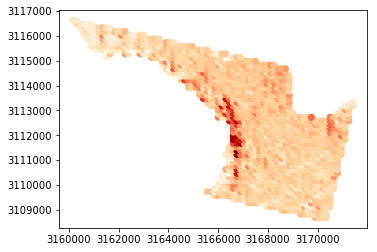

In [15]:
HOGgeo.plot(column='1',cmap='OrRd')
plt.show()

In [16]:
HOGgeo.reset_index(drop=True, inplace=True)

In [17]:
HOGgeo['mindep'] = 0
HOGgeo['drange']= 0
HOGgeo['cellav']=0
HOGgeo['allav']=0

In [18]:
xm = np.ma.masked_invalid(array)
avdep = np.mean(xm)

In [19]:
for index, row in HOGgeo.iterrows():
   
    r = int(HOGgeo.loc[index,['R']].values)
    c = int(HOGgeo.loc[index,['C']].values)
    rmin = r*hogval
    rmax = r*hogval+hogval
    cmin = c*hogval
    cmax = c*hogval+hogval
    
    b = array[rmin:rmax,cmin:cmax]
    b = b.astype('float')
    
    bm = np.ma.masked_invalid(b)
    
    rangez = np.max(bm)-np.min(bm)
    HOGgeo.loc[index,['drange']] = rangez
    
    HOGgeo.loc[index,['cellav']] = np.mean(bm) - np.min(bm)
    HOGgeo.loc[index,['allav']] = avdep - np.min(bm)
    
    b[np.isnan(b)] = 10000
    HOGgeo.loc[index,['mindep']] = np.min(bm)
    

/anaconda/lib/python3.6/site-packages/pandas/core/internals.py:758: UserWarning: Warning: converting a masked element to nan.
  values[indexer] = value


In [31]:
HOGgeo['1']=HOGgeo['1'].fillna(0)
HOGgeo['2']=HOGgeo['2'].fillna(0)
HOGgeo['3']=HOGgeo['3'].fillna(0)
HOGgeo['4']=HOGgeo['4'].fillna(0)
HOGgeo['mindep']=HOGgeo['mindep'].fillna(0)
HOGgeo['drange']=HOGgeo['drange'].fillna(0)
HOGgeo['cellav']=HOGgeo['cellav'].fillna(0)
HOGgeo['allav']=HOGgeo['allav'].fillna(0)

In [22]:
HOGgeo.head(100)

,R,C,1,2,3,4,XA,XB,YA,YB,midX,midY,geometry,mindep,drange,cellav,allav
0,0,0,0.0,0.0,0.0,0.0,3.159329e+06,3.159479e+06,3.108450e+06,3.108600e+06,3.159404e+06,3.108525e+06,POINT (3159403.990025371 3108524.721963901),0.000,0.000,0.000000,0.000000
1,0,1,0.0,0.0,0.0,0.0,3.159479e+06,3.159629e+06,3.108450e+06,3.108600e+06,3.159554e+06,3.108525e+06,POINT (3159553.990025371 3108524.721963901),0.000,0.000,0.000000,0.000000
2,0,2,0.0,0.0,0.0,0.0,3.159629e+06,3.159779e+06,3.108450e+06,3.108600e+06,3.159704e+06,3.108525e+06,POINT (3159703.990025371 3108524.721963901),0.000,0.000,0.000000,0.000000
3,0,3,0.0,0.0,0.0,0.0,3.159779e+06,3.159929e+06,3.108450e+06,3.108600e+06,3.159854e+06,3.108525e+06,POINT (3159853.990025371 3108524.721963901),0.000,0.000,0.000000,0.000000
4,0,4,0.0,0.0,0.0,0.0,3.159929e+06,3.160079e+06,3.108450e+06,3.108600e+06,3.160004e+06,3.108525e+06,POINT (3160003.990025371 3108524.721963901),0.000,0.000,0.000000,0.000000
5,0,5,0.0,0.0,0.0,0.0,3.160079e+06,3.160229e+06,3.108450e+06,3.108600e+06,3.160154e+06,3.108525e+06,POINT (3160153.990025371 3108524.721963901),0.000,0.000,0.000000,0.000000
6,0,6,0.0,0.0,0.0,0.0,3.160229e+06,3.160379e+06,3.108450e+06,3.108600e+06,3.160304e+06,3.108525e+06,POINT (3160303.990025371 3108524.721963901),0.000,0.000,0.000000,0.000000
7,0,7,0.0,0.0,0.0,0.0,3.160379e+06,3.160529e+06,3.108450e+06,3.108600e+06,3.160454e+06,3.108525e+06,POINT (3160453.990025371 3108524.721963901),0.000,0.000,0.000000,0.000000
8,0,8,0.0,0.0,0.0,0.0,3.160529e+06,3.160679e+06,3.108450e+06,3.108600e+06,3.160604e+06,3.108525e+06,POINT (3160603.990025371 3108524.721963901),0.000,0.000,0.000000,0.000000
9,0,9,0.0,0.0,0.0,0.0,3.160679e+06,3.160829e+06,3.108450e+06,3.108600e+06,3.160754e+06,3.108525e+06,POINT (3160753.990025371 3108524.721963901),0.000,0.000,0.000000,0.000000


In [23]:
#Import selected soundings and project

geometry = [Point(xy) for xy in zip(ss.X, ss.Y)]
crs = {'init': 'epsg:4326'}
ss = gpd.GeoDataFrame(ss, crs=crs, geometry=geometry)

#convert to 3035
ss = ss.to_crs({'init': 'epsg:3035'})

ss['Xp']= ss.geometry.apply(lambda p: p.x)
ss['Yp'] = ss.geometry.apply(lambda p: p.y)

# ss.plot(column='Depth',cmap='OrRd')
# plt.show()

In [24]:
#finding the grid square each sounding in ss is in, saving these hit locations to location

ss['NearestC'] =(ss['Xp'] - minx) /stepxhog
ss['NearestR'] =(ss['Yp'] - miny) /stepyhog

locations = ss.loc[:,['NearestC','NearestR']]

In [25]:
floored_locations= locations.apply(np.floor)

In [26]:
# zero_data = np.zeros(shape=(len(floored_locations),29))
# positives = pd.DataFrame(zero_data, columns=['A', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10','C11','C12', 'C13','C14','C15', 'C16', 'mindep','cellav','allav','drange'])
#positives = pd.DataFrame()

In [60]:
#create a test dataset which has the nearest 25 cells
#this is the old method - gives all 4 of the directions
positives = pd.DataFrame()

for i in range(0,len(floored_locations)):
    fC = floored_locations.iloc[i][0]
    fR = floored_locations.iloc[i][1]
    
    A = list(HOG_output[(HOG_output['R'] == fR) & (HOG_output['C'] == fC)].loc[:,['1','2','3','4']].values.flatten())

    #positives.loc[i,['B1']] = HOGgeo[(HOGgeo['R'] == (fR-1)) & (HOGgeo['C'] == fC)].loc[:,['90']].values if fR-1 in range(0,row) and fC in range(0,col) else 0
    
    B1 = list(HOG_output[(HOG_output['R'] == (fR-1)) & (HOG_output['C'] == fC)].loc[:,['1','2','3','4']].values.flatten()) 
    B2 = list(HOG_output[(HOG_output['R'] == (fR-1)) & (HOG_output['C'] == (fC+1))].loc[:,['1','2','3','4']].values.flatten())
    B3 = list(HOG_output[(HOG_output['R'] == fR) & (HOG_output['C'] == (fC+1))].loc[:,['1','2','3','4']].values.flatten())
    B4 = list(HOG_output[(HOG_output['R'] == (fR+1)) & (HOG_output['C'] == (fC+1))].loc[:,['1','2','3','4']].values.flatten())
    B5 = list(HOG_output[(HOG_output['R'] == (fR+1)) & (HOG_output['C'] == fC)].loc[:,['1','2','3','4']].values.flatten())
    B6 = list(HOG_output[(HOG_output['R'] == (fR+1)) & (HOG_output['C'] == (fC-1))].loc[:,['1','2','3','4']].values.flatten())
    B7 = list(HOG_output[(HOG_output['R'] == fR) & (HOG_output['C'] == (fC-1))].loc[:,['1','2','3','4']].values.flatten())
    B8 = list(HOG_output[(HOG_output['R'] == (fR-1)) & (HOG_output['C'] == (fC-1))].loc[:,['1','2','3','4']].values.flatten())
    
    C1 = list(HOG_output[(HOG_output['R'] == (fR-2)) & (HOG_output['C'] == fC)].loc[:,['1','2','3','4']].values.flatten())
    C2 = list(HOG_output[(HOG_output['R'] == (fR-2)) & (HOG_output['C'] == (fC+1))].loc[:,['1','2','3','4']].values.flatten())
    C3 = list(HOG_output[(HOG_output['R'] == (fR-2)) & (HOG_output['C'] == (fC+2))].loc[:,['1','2','3','4']].values.flatten())
    C4 = list(HOG_output[(HOG_output['R'] == (fR-1)) & (HOG_output['C'] == (fC+2))].loc[:,['1','2','3','4']].values.flatten())
    C5 = list(HOG_output[(HOG_output['R'] == fR) & (HOG_output['C'] == (fC+2))].loc[:,['1','2','3','4']].values.flatten())
    C6 = list(HOG_output[(HOG_output['R'] == (fR+1)) & (HOG_output['C'] == (fC+2))].loc[:,['1','2','3','4']].values.flatten())
    C7 = list(HOG_output[(HOG_output['R'] == (fR+2)) & (HOG_output['C'] == (fC+2))].loc[:,['1','2','3','4']].values.flatten())
    C8 = list(HOG_output[(HOG_output['R'] == (fR+2)) & (HOG_output['C'] == (fC+1))].loc[:,['1','2','3','4']].values.flatten())
    C9 = list(HOG_output[(HOG_output['R'] == (fR+2)) & (HOG_output['C'] == fC)].loc[:,['1','2','3','4']].values.flatten())
    C10 = list(HOG_output[(HOG_output['R'] == (fR+2)) & (HOG_output['C'] == (fC-1))].loc[:,['1','2','3','4']].values.flatten())
    C11 = list(HOG_output[(HOG_output['R'] == (fR+2)) & (HOG_output['C'] == (fC-2))].loc[:,['1','2','3','4']].values.flatten())
    C12 = list(HOG_output[(HOG_output['R'] == (fR+1)) & (HOG_output['C'] == (fC-2))].loc[:,['1','2','3','4']].values.flatten())
    C13 = list(HOG_output[(HOG_output['R'] == fR) & (HOG_output['C'] == (fC-2))].loc[:,['1','2','3','4']].values.flatten())
    C14 = list(HOG_output[(HOG_output['R'] == (fR-1)) & (HOG_output['C'] == (fC-2))].loc[:,['1','2','3','4']].values.flatten())
    C15 = list(HOG_output[(HOG_output['R'] == (fR-2)) & (HOG_output['C'] == (fC-2))].loc[:,['1','2','3','4']].values.flatten())
    C16 = list(HOG_output[(HOG_output['R'] == (fR-2)) & (HOG_output['C'] == (fC-1))].loc[:,['1','2','3','4']].values.flatten())
    
    
    
    row = A +B1 + B2 + B3 + B4 + B5 + B6 + B7 + B8 + C1 + C2 + C3+ C4 + C5 + C6 + C7 + C8 + C9 + C10 + C11 + C12 + C13 + C14 + C15 + C16

    positives = positives.append([row])
    

SyntaxError: can't assign to conditional expression (<ipython-input-60-e54185a416a3>, line 13)

In [59]:
B1

[0.23240374220636634,
 0.30648761859656254,
 0.27943991535607832,
 0.18158878406034645]

In [52]:
positives['mindep'] = 0
positives['drange']= 0
positives['cellav']=0
positives['allav']=0

In [53]:
positives.reset_index(drop=True, inplace=True)

In [54]:
positives

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,mindep,drange,cellav,allav
0,0.231403,0.232485,0.262485,0.273485,0.230640,0.287786,0.268527,0.212868,0.231333,0.231964,...,0.254402,0.205242,0.297238,0.289492,0.173262,0.239873,0,0,0,0
1,0.264737,0.223222,0.239269,0.272665,0.252101,0.220232,0.292361,0.235181,0.345524,0.164649,...,0.245656,0.290600,0.210491,0.196869,0.277313,0.315166,0,0,0,0
2,0.215694,0.315837,0.221410,0.246964,0.267205,0.242519,0.254873,0.235294,0.247279,0.257551,...,0.176290,0.112273,0.266729,0.262697,0.313054,0.157425,0,0,0,0
3,0.202603,0.314871,0.246538,0.235822,0.218001,0.484316,0.187766,0.109809,0.274657,0.232994,...,0.026619,0.060857,0.292543,0.552940,0.078506,0.075936,0,0,0,0
4,0.141887,0.858098,0.000000,0.000000,0.022922,0.940361,0.023054,0.013650,0.594394,0.336259,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
5,0.168578,0.831412,0.000000,0.000000,0.005945,0.974317,0.019729,0.000000,0.067172,0.932822,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
6,0.252075,0.295740,0.285179,0.166857,0.162302,0.750412,0.061481,0.025766,0.231666,0.420568,...,0.000000,0.000000,0.201551,0.797668,0.000771,0.000000,0,0,0,0
7,0.550431,0.297905,0.070863,0.080717,0.337837,0.290413,0.158487,0.213180,0.470138,0.253820,...,0.045412,0.011361,0.344750,0.508271,0.107230,0.039714,0,0,0,0
8,0.297966,0.244472,0.193884,0.263635,0.196804,0.615028,0.084874,0.103248,0.420111,0.431045,...,0.186876,0.217555,0.395841,0.422551,0.139547,0.042035,0,0,0,0
9,0.442608,0.518298,0.019274,0.019783,0.254407,0.391730,0.190586,0.163271,0.528662,0.439393,...,NaN,NaN,0.288633,0.381010,0.236736,0.093613,0,0,0,0


In [55]:
for i in range(0,len(floored_locations)):
    fC = floored_locations.iloc[i][0]
    fR = floored_locations.iloc[i][1]
    
    positives.loc[i,['mindep']] = float(HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == fC)].loc[:,['mindep']].values)
    
    positives.loc[i,['cellav']] = float(HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == fC)].loc[:,['cellav']].values)
    
    positives.loc[i,['allav']] = float(HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == fC)].loc[:,['allav']].values)
    
    positives.loc[i,['drange']] = float(HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == fC)].loc[:,['drange']].values)

In [56]:
positives

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,mindep,drange,cellav,allav
0,0.231403,0.232485,0.262485,0.273485,0.230640,0.287786,0.268527,0.212868,0.231333,0.231964,...,0.254402,0.205242,0.297238,0.289492,0.173262,0.239873,74.331,0.712,0.396898,-3.318985
1,0.264737,0.223222,0.239269,0.272665,0.252101,0.220232,0.292361,0.235181,0.345524,0.164649,...,0.245656,0.290600,0.210491,0.196869,0.277313,0.315166,74.834,0.724,0.439244,-3.821985
2,0.215694,0.315837,0.221410,0.246964,0.267205,0.242519,0.254873,0.235294,0.247279,0.257551,...,0.176290,0.112273,0.266729,0.262697,0.313054,0.157425,74.441,1.102,0.584493,-3.428985
3,0.202603,0.314871,0.246538,0.235822,0.218001,0.484316,0.187766,0.109809,0.274657,0.232994,...,0.026619,0.060857,0.292543,0.552940,0.078506,0.075936,75.240,0.738,0.350689,-4.227985
4,0.141887,0.858098,0.000000,0.000000,0.022922,0.940361,0.023054,0.013650,0.594394,0.336259,...,NaN,NaN,NaN,NaN,NaN,NaN,54.125,15.301,7.100524,16.887015
5,0.168578,0.831412,0.000000,0.000000,0.005945,0.974317,0.019729,0.000000,0.067172,0.932822,...,NaN,NaN,NaN,NaN,NaN,NaN,46.443,22.955,13.488289,24.569015
6,0.252075,0.295740,0.285179,0.166857,0.162302,0.750412,0.061481,0.025766,0.231666,0.420568,...,0.000000,0.000000,0.201551,0.797668,0.000771,0.000000,73.103,1.101,0.742907,-2.090985
7,0.550431,0.297905,0.070863,0.080717,0.337837,0.290413,0.158487,0.213180,0.470138,0.253820,...,0.045412,0.011361,0.344750,0.508271,0.107230,0.039714,71.987,2.202,1.180640,-0.974985
8,0.297966,0.244472,0.193884,0.263635,0.196804,0.615028,0.084874,0.103248,0.420111,0.431045,...,0.186876,0.217555,0.395841,0.422551,0.139547,0.042035,70.338,3.109,1.512573,0.674015
9,0.442608,0.518298,0.019274,0.019783,0.254407,0.391730,0.190586,0.163271,0.528662,0.439393,...,NaN,NaN,0.288633,0.381010,0.236736,0.093613,63.678,6.633,3.481284,7.334015
